<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue"><center><h1>Residual Values in Regression Analysis</h1></center></font><br>
<ul>
    <li>Simple linear regression models are used to determine the relationship between the magniture of one variable, to that of a second variable.</li><br>
    <li>In machine learning, this is typically to determine if one variable can be used to predict a second variable.</li><br>
    <li>Two key concepts and terms in regression is the <font color="blue"><em>Fitted Value</em></font> and the <font color="blue"><em>Residual Value</em></font></li><br>
    <li>The <strong>goal</strong> of this post is to discuss Residual Value, and demonstrate how it can be calculate.</li>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Import Dependencies</h1>

In [31]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()
# Math and dataframe modules
import numpy as np
import pandas as pd

# Stats module
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

<hr style="border-top: 3px solid Black;">

<h1> Import Data</h1>

<a href="https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset">Documentation</a>

<ul>
    <li>Instances: 442</li>
    <li>Attributes: 10</li>
    <li>Target:1 is the quantitative measure of disease progression one year after baselin</li> 
</ul>

<strong>References</strong>

<li>Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499.</li>

In [25]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target)

<h1>Create dataframe from X, y</h1>

In [26]:
# create dataframe from X, y for easier plot handling
names = ['age', 'sex','bmi','bp','s1','s2','s3','s4','s5','s6', 'DP']
dataframe = pd.concat([X, y], axis=1)
dataframe.columns = names
dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DP
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<hr style="border-top: 3px solid Black;">

<h1>Relationship between T cells and Diabetes Disease Progession</h1>

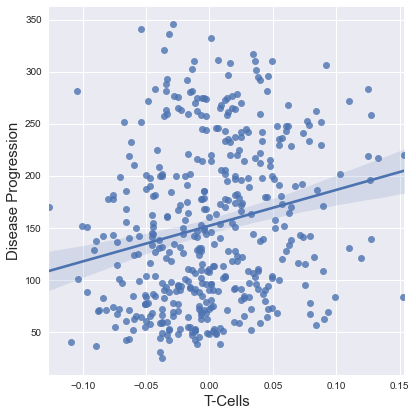

In [27]:
#Seaborn
ax = sns.lmplot(x='s1', y='DP', height=6, data=dataframe)
ax.set(xlabel='T-Cells', ylabel='Disease Progression')
plt.savefig("images/reg.png", bbox_inches='tight')
plt.show()

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue">Note</font><br>
<ul>
<li>In this plot we see that the disease progression score seems to increase with the number of T cells measured.</li><br>
    <li><font color="blue">Note</font> Features have been normalized, please see documentation for additional information.</li><br>
    <li>The blue line is based on a function that tries to best estimate of how the disease progression will change with T-cells.</li><br>
    <li>Note that a majority of the data does not fall exactly on the line, so the regression equation used to draw that line accounts for this by including an error term.</li>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>How good is the regression model?</h1>

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue"><h4>The All Mighty Residual</h4>
</font>
<ul>
<li>One metric used to evaluate the performance of a model is by looking at the distance between the actual data and the models predicted function (curve)</li><br>
    <li>As illustrated below, the red line segments are considered the error between the actual data (Y value) and the predicted data (Y hat value)</li><br>
    <li>The predicted value is also referred to as the <font color="red">fitted</font> value.  This value originates from the regression algorithm.</li><br>
    <li>The magnitude of this segment is referred to as the residual.</li><br>
    <li>The residual is used in various diagnostic plots to determine if the regression curve is linear, or better defined by some other function</li>
</ul>
</div>

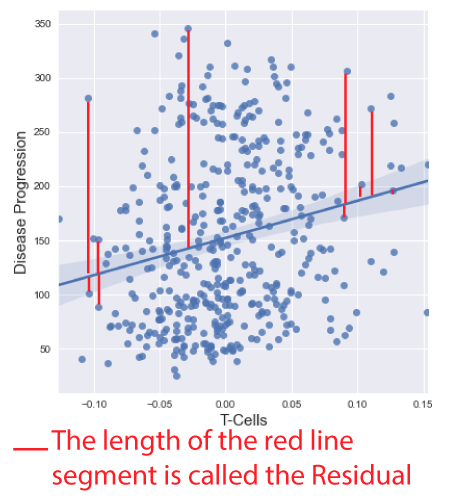

In [33]:
residual_segments = os.path.join(path, 'images/residual_segments.png')
Image(filename=residual_segments) 

<hr style="border-top: 3px solid Black;">

<h1>How to Calculate the Residual</h1>

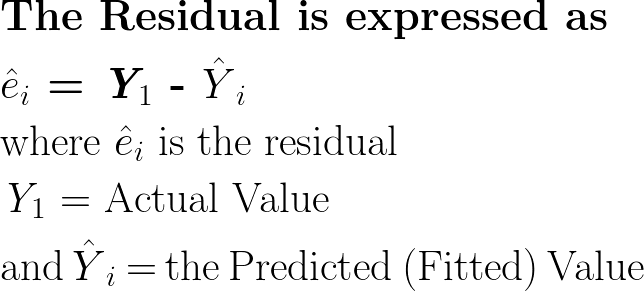

In [44]:
residual_formula = os.path.join(path, 'images/residual_formula.png')
Image(filename=residual_formula) 

<hr style="border-top: 3px solid Black;">

<h1>Use <code>statsmodels</code> to Calculate the Residuals</h1>

<h1>Step 1: Generate Ordinary Least Square Model</h1>

In [45]:
# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

<h1>Step 2: Use <code>model_fit.resid</code> to Obtain Array of Residuals</h1>

In [46]:
# model residuals
model_residuals = model_fit.resid
# model values (these are the predicted, or fitted values)
model_fitted_y = model_fit.fittedvalues

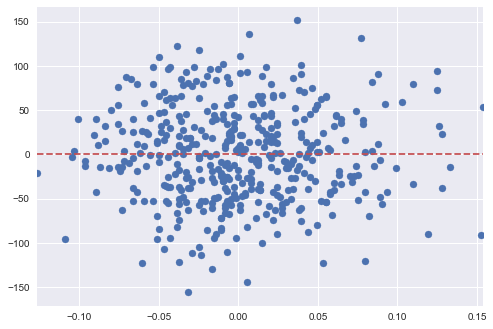

In [47]:
fig, ax = plt.subplots()
ax.scatter(dataframe.s1, model_residuals)
ax.hlines(0, dataframe.s1.min(), dataframe.s1.max(), linestyles='dashed', colors='r')
ax.set_xlim(dataframe.s1.min(), dataframe.s1.max())
plt.show()

<h1>Generate Residual Plots for Simple Linear Regression</h1>

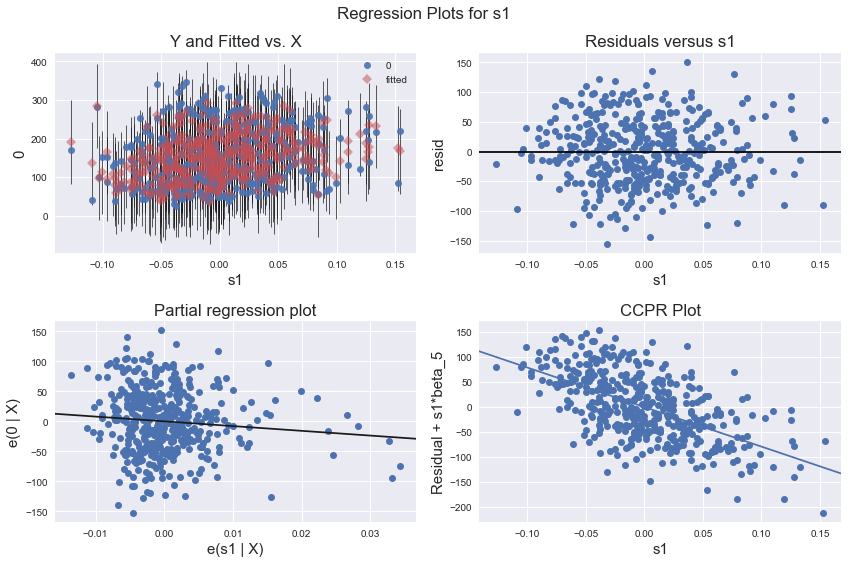

In [49]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model_fit, 's1', fig=fig)

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue">What do these plots mean?</font><br>
<ul>
    <li>The four plots above are examples of diagnostic tools based on residuals, and are espetially informative when using Multiple Linear regressions. This is overkill for this example as we are only looking at one specific predictor variable.</li><br>
<li><font color="blue">Pay attention to the top right plot</font> This plot is the residual vs. feature of interest in this post, the T cells. The x-axis on this plot shows the actual values for the predictor variable points (T cells) and the y-axis shows the residual for that value.</li><br>
    <li>Since the data points appear to be randomly distributed along the horizontal 0 line, suggest the data is not Heteroskedastisdic for the predictor variable.</li><br>
</ul>
</div>